CNN model Cat dog classifier

In [2]:
import os 
import cv2  # computer vision
import matplotlib.pyplot as plt


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D , Flatten, Dense, Dropout
from tensorflow.keras.layers import MaxPool2D
from keras.utils.np_utils import to_categorical

In [4]:
# pip install opencv-python

In [5]:
path1 = r'F:\DS\KAGGLE DATASET\Neural Network\dogcat'
cate = ['dogs','cats']

In [6]:
# for i in cate:
#     folders = os.path.join(path1 , i)  # Dog folder inside the dogcat folder and then cat folder
#     for image in os.listdir(folders):
#         image_path = os.path.join(folders,image)
#         print(image_path)

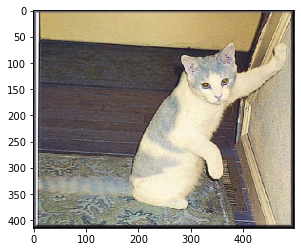

In [7]:
for i in cate:
    folders = os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        break
        
# Just for to make the understand the we are able to read the image

In [8]:
len(image_array)

415

In [9]:
image_array.shape

(415, 498, 3)

In [10]:
image_size = 200  # its also a hyperparameter
path1 = r'F:\DS\KAGGLE DATASET\Neural Network\dogcat'
cate = ['dogs','cats']
input_image = []
for i in cate:
    folders = os.path.join(path1 , i)
    label = cate.index(i) # we need to tell the softwere which image is dog and which is cat
    for image in os.listdir(folders):
        image_path = os.path.join(folders,image)
        image_array = cv2.imread(image_path) # using the cv2 i am reading the image and storing it in varaible image_array
        image_array = cv2.resize(image_array, (image_size , image_size)) # resize each image to 200,200
        input_image.append([image_array , label])
        
        

Now we do sampling

In [11]:
# now you shuffle the data and select top 80 as train and last 20% as test or just opposite

In [12]:
np.random.shuffle(input_image)   # to shuffle the image as the data

<IPython.core.display.Javascript object>

In [13]:
x = []
y = []
for x_values , labels in input_image:
    x.append(x_values)
    y.append(labels)

In [14]:
len(x)

2023

In [15]:
len(y)

2023

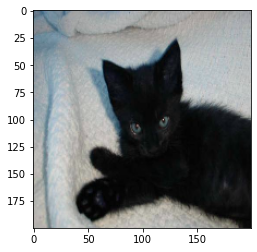

In [16]:
plt.imshow(x[2]);

In [17]:
x = np.array(x)
y = np.array(y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# if you want you can divide the data into train and test

In [19]:
x = x/255  # very essential step

In [20]:
x[1]

array([[[0.42352941, 0.5372549 , 0.56470588],
        [0.42352941, 0.5372549 , 0.56470588],
        [0.42745098, 0.54117647, 0.56862745],
        ...,
        [0.51372549, 0.5254902 , 0.51764706],
        [0.52156863, 0.53333333, 0.5254902 ],
        [0.5254902 , 0.5372549 , 0.52941176]],

       [[0.41960784, 0.53333333, 0.56078431],
        [0.42352941, 0.5372549 , 0.56470588],
        [0.42745098, 0.54117647, 0.56862745],
        ...,
        [0.51372549, 0.5254902 , 0.51764706],
        [0.51372549, 0.5254902 , 0.51764706],
        [0.51372549, 0.5254902 , 0.51764706]],

       [[0.40784314, 0.52156863, 0.54901961],
        [0.41568627, 0.52941176, 0.55686275],
        [0.42352941, 0.5372549 , 0.56470588],
        ...,
        [0.51764706, 0.52941176, 0.52156863],
        [0.52156863, 0.53333333, 0.5254902 ],
        [0.52156863, 0.53333333, 0.5254902 ]],

       ...,

       [[0.68627451, 0.71764706, 0.71372549],
        [0.6745098 , 0.70588235, 0.70196078],
        [0.67058824, 0

In [21]:
model = Sequential()
model.add(Conv2D(filters = 20, kernel_size = (3,3), activation = 'relu', ))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu', input_shape = x.shape[1:]))
model.add(Dropout(0.4))
model.add(Dense(2, activation = 'softmax'))  # output is cat and dog thats why 2

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
model.fit(x , y , epochs = 20)

Epoch 1/20
64/64 [==============================] - 70s 1s/step - loss: 2.2424 - accuracy: 0.5363
Epoch 2/20
64/64 [==============================] - 66s 1s/step - loss: 0.6835 - accuracy: 0.5393
Epoch 3/20
64/64 [==============================] - 69s 1s/step - loss: 0.6674 - accuracy: 0.5957
Epoch 4/20
64/64 [==============================] - 70s 1s/step - loss: 0.6379 - accuracy: 0.6174
Epoch 5/20
64/64 [==============================] - 68s 1s/step - loss: 0.5990 - accuracy: 0.6663
Epoch 6/20
64/64 [==============================] - 67s 1s/step - loss: 0.5274 - accuracy: 0.7242
Epoch 7/20
64/64 [==============================] - 69s 1s/step - loss: 0.4637 - accuracy: 0.7850
Epoch 8/20
64/64 [==============================] - 67s 1s/step - loss: 0.3844 - accuracy: 0.8300
Epoch 9/20
64/64 [==============================] - 67s 1s/step - loss: 0.3092 - accuracy: 0.8705
Epoch 10/20
64/64 [==============================] - 63s 981ms/step - loss: 0.2641 - accuracy: 0.8888
Epoch 11/20
64/6

In [23]:
x.shape

(2023, 200, 200, 3)

In [24]:
model.fit(x , y , epochs = 20, validation_split = 0.2)

Epoch 1/20
51/51 [==============================] - 57s 1s/step - loss: 0.0657 - accuracy: 0.9759 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 2/20
51/51 [==============================] - 58s 1s/step - loss: 0.0600 - accuracy: 0.9808 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 3/20
51/51 [==============================] - 57s 1s/step - loss: 0.0527 - accuracy: 0.9790 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 4/20
51/51 [==============================] - 60s 1s/step - loss: 0.0611 - accuracy: 0.9808 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 5/20
51/51 [==============================] - 57s 1s/step - loss: 0.0480 - accuracy: 0.9839 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 6/20
51/51 [==============================] - 58s 1s/step - loss: 0.0416 - accuracy: 0.9845 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 7/20
51/51 [==============================] - 59s 1s/step - loss: 0.0343 - accuracy: 0.9870 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 8/20
51/51 [==

In [2]:
# model.save('catdog.h5') # to save the model 